# Iris Flower Classification

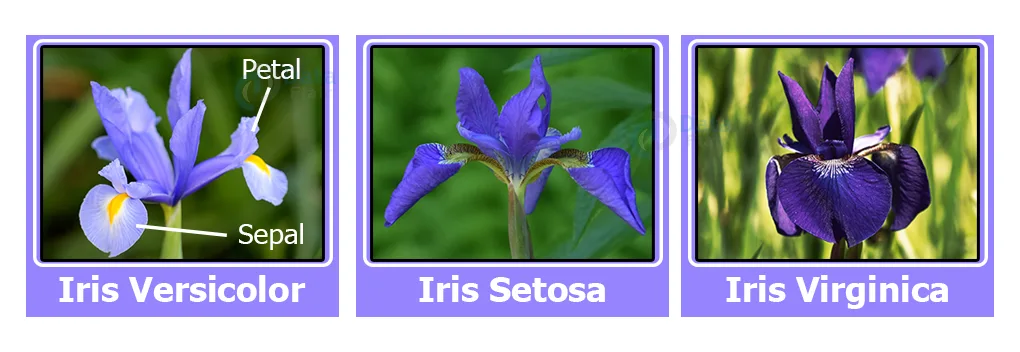

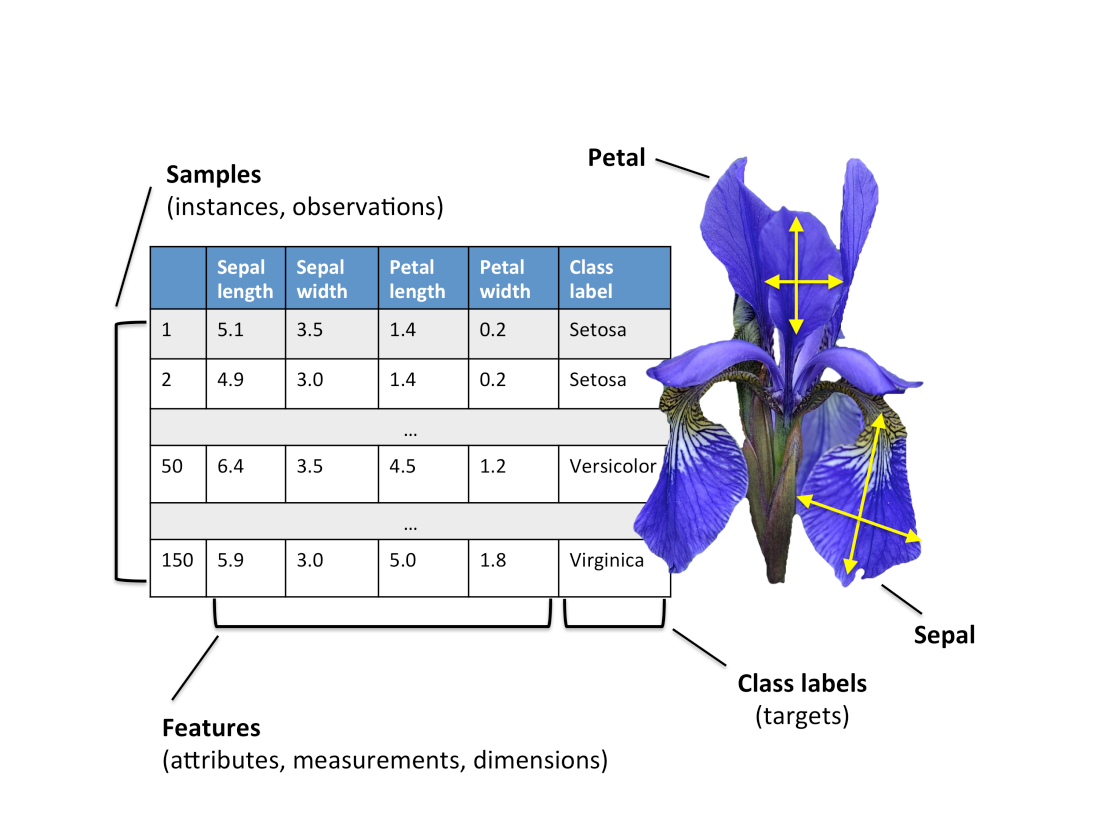

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sb
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv("Dataset/IRIS.csv")

In [162]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [163]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [164]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Basic information of dataset

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [166]:
df.shape

(150, 5)

In [167]:
df.size

750

In [168]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [169]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

**Check for Null Values and Duplicated Values**

In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.duplicated().sum()

3

In [5]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

**no. of Samples**

In [6]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

# Data Visualization

In [7]:
import seaborn
import matplotlib.pyplot as plt

**Pair Plot**

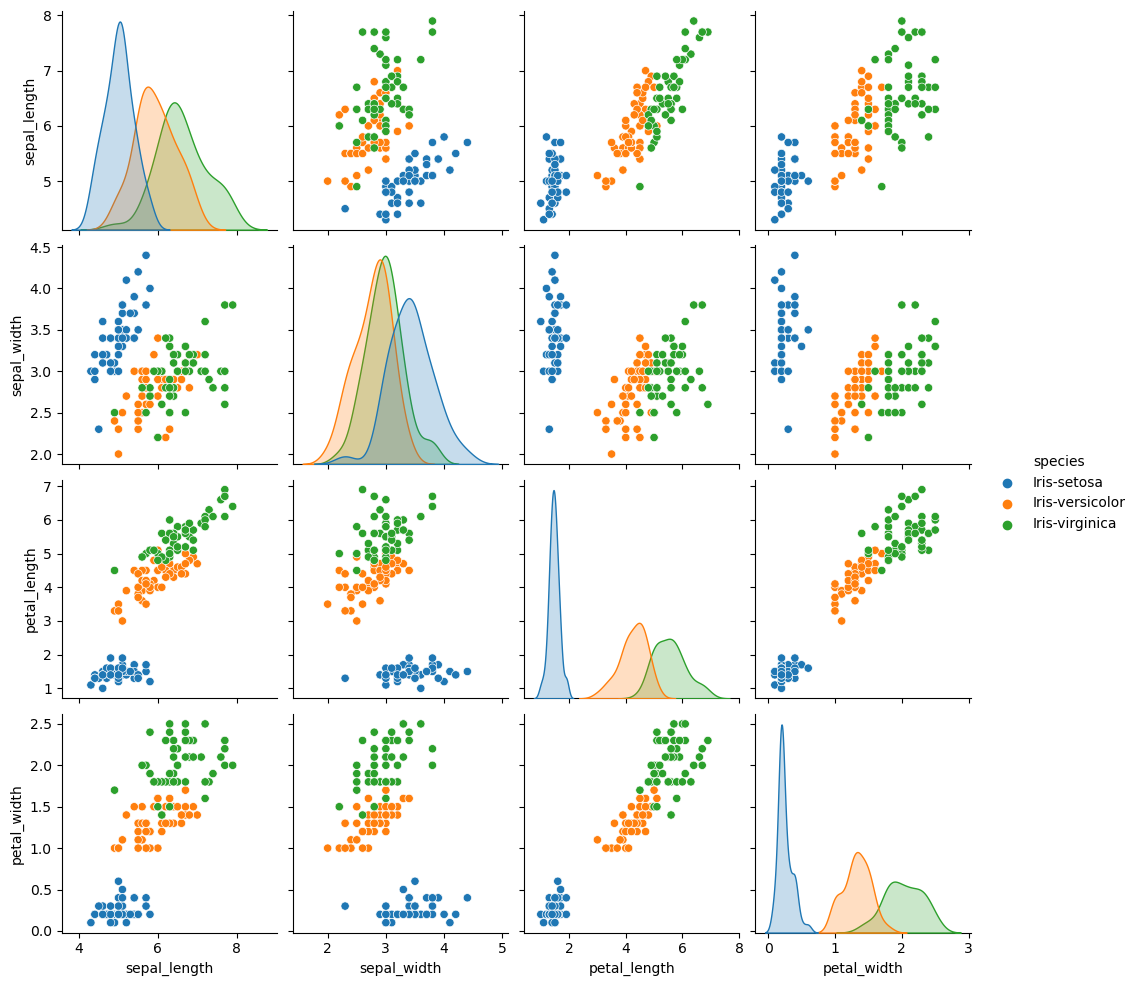

In [8]:
seaborn.pairplot(df, hue = 'species')
pt.show()

**Heat Map**

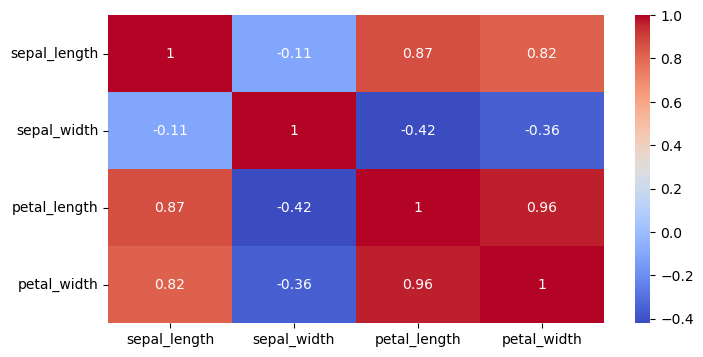

In [9]:
pt.figure(figsize=(8,4))
sb.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
pt.show()

**Scatter Plot**

In [10]:
import seaborn as sns 

[]

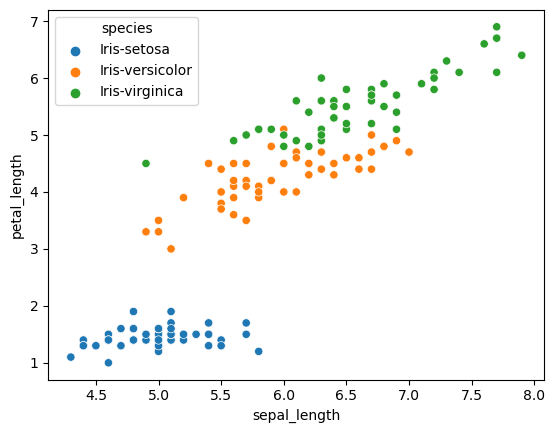

In [11]:
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='sepal_length', 
                y='petal_length', hue='species') 
plt.plot() 

[]

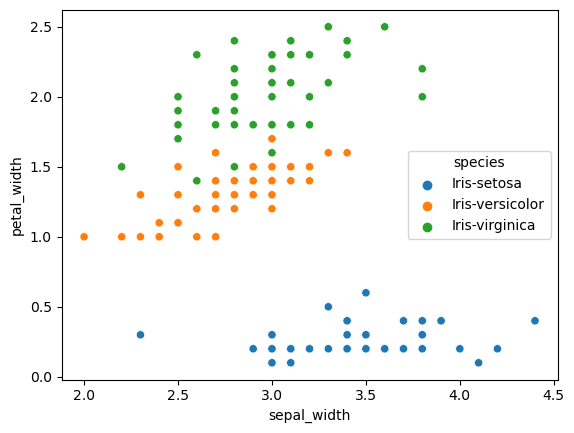

In [12]:
# plotting a scatterplot using seaborn 
sns.scatterplot(data=df, x='sepal_width', 
                y='petal_width', hue='species') 
plt.plot() 

***CountPLot***

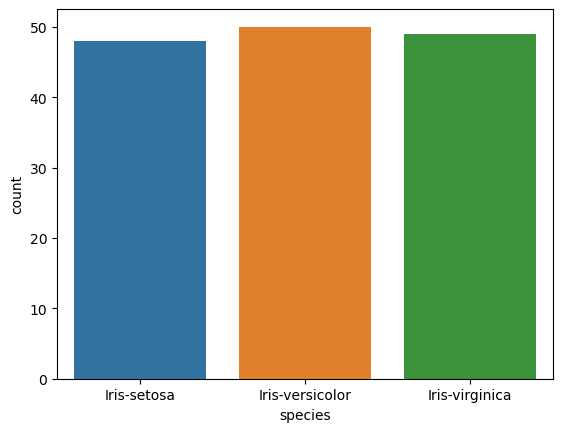

In [13]:
# count plot on single categorical variable
sns.countplot(x ='species', data = df)
 
# Show the plot
plt.show()

**Histogram**

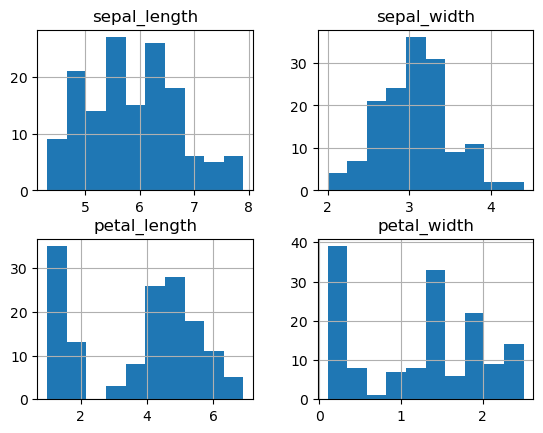

In [14]:
import matplotlib.pyplot as plt
df.hist()
plt.show()

**Grouped Bar Plot**

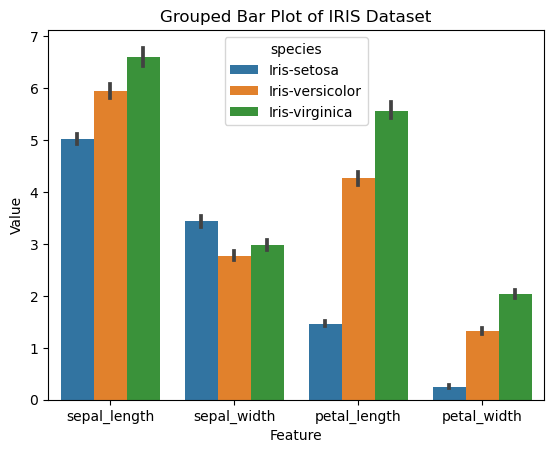

In [15]:
import seaborn as sns
import pandas as pd



# Create a melted DataFrame
melted_iris = pd.melt(df, id_vars="species", value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])

# Create a grouped bar plot
sns.barplot(x="variable", y="value", hue="species", data=melted_iris)

# Set the x-axis and y-axis labels
plt.xlabel("Feature")
plt.ylabel("Value")

# Add a title
plt.title("Grouped Bar Plot of IRIS Dataset")

# Show the plot
plt.show()

# Model Training

In [102]:
from sklearn.model_selection import train_test_split

**Splitting the dataset into 80% training data and 20% test data**

In [103]:
# input data
X = df.drop(columns=['species'])
# output data
Y = df['species']
# split the data for train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)

**Logistic Regression**

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

**Accuracy:** 

In [106]:
print("Logistic Regression Accuracy: ", model.score(x_test, y_test) * 100)

Logistic Regression Accuracy:  93.33333333333333


**K-Nearest Neighbours**

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

**Accuracy:**

In [109]:
print("K-nearest neighbors Accuracy: ", model.score(x_test, y_test) * 100)

K-nearest neighbors Accuracy:  93.33333333333333


**Decision Tree** 

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

**Accuracy:**

In [112]:
print("Decision Tree Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree Accuracy:  93.33333333333333


**Naive Bayesian**

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

**Accuracy:**

In [115]:
print("Naive Bayesian Accuracy: ", model.score(x_test, y_test) * 100)

Naive Bayesian Accuracy:  96.66666666666667


# Saving the Model

In [116]:
import pickle

In [117]:
filename = 'Iris_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.


# Test the Model

In [118]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8
53,5.5,2.3,4.0,1.3
140,6.7,3.1,5.6,2.4
19,5.1,3.8,1.5,0.3
106,4.9,2.5,4.5,1.7


In [119]:
load_model = pickle.load(open(filename, 'rb'))

**"sepal_length", "sepal_width", "petal_length", "petal_width"**

**Predict Class**

In [120]:
load_model.predict([[4.9, 3.1, 1.5, 0.1]])

array(['Iris-setosa'], dtype='<U15')